In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import time

In [2]:
df = pd.read_csv('../fifa_dataset.csv')

# Dealing with Missing Values

In [3]:
df.drop(columns='Loaned From',inplace=True) # I dropped this column as 90% of the values were missing

In [4]:
df.dropna(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16643 entries, 0 to 18206
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        16643 non-null  int64  
 1   Name                      16643 non-null  object 
 2   Age                       16643 non-null  int64  
 3   Nationality               16643 non-null  object 
 4   Overall                   16643 non-null  int64  
 5   Potential                 16643 non-null  int64  
 6   Club                      16643 non-null  object 
 7   Value                     16643 non-null  object 
 8   Wage                      16643 non-null  object 
 9   Preferred Foot            16643 non-null  object 
 10  International Reputation  16643 non-null  float64
 11  Weak Foot                 16643 non-null  float64
 12  Skill Moves               16643 non-null  float64
 13  Work Rate                 16643 non-null  object 
 14  Body T

# Converting Column Data types to their correct Data types

In [6]:
for col in df.columns:
    if df[col].dtype=='object':
        print(col)
        display(df[col].head())

Name


0             L. Messi
1    Cristiano Ronaldo
2            Neymar Jr
3               De Gea
4         K. De Bruyne
Name: Name, dtype: object

Nationality


0    Argentina
1     Portugal
2       Brazil
3        Spain
4      Belgium
Name: Nationality, dtype: object

Club


0           FC Barcelona
1               Juventus
2    Paris Saint-Germain
3      Manchester United
4        Manchester City
Name: Club, dtype: object

Value


0    €110.5M
1       €77M
2    €118.5M
3       €72M
4      €102M
Name: Value, dtype: object

Wage


0    €565K
1    €405K
2    €290K
3    €260K
4    €355K
Name: Wage, dtype: object

Preferred Foot


0     Left
1    Right
2    Right
3    Right
4    Right
Name: Preferred Foot, dtype: object

Work Rate


0    Medium/ Medium
1         High/ Low
2      High/ Medium
3    Medium/ Medium
4        High/ High
Name: Work Rate, dtype: object

Body Type


0         Messi
1    C. Ronaldo
2        Neymar
3          Lean
4        Normal
Name: Body Type, dtype: object

Position


0     RF
1     ST
2     LW
3     GK
4    RCM
Name: Position, dtype: object

Joined


0     Jul 1, 2004
1    Jul 10, 2018
2     Aug 3, 2017
3     Jul 1, 2011
4    Aug 30, 2015
Name: Joined, dtype: object

Contract Valid Until


0    2021
1    2022
2    2022
3    2020
4    2023
Name: Contract Valid Until, dtype: object

Height


0     5'7
1     6'2
2     5'9
3     6'4
4    5'11
Name: Height, dtype: object

Weight


0    159lbs
1    183lbs
2    150lbs
3    168lbs
4    154lbs
Name: Weight, dtype: object

Release Clause


0    €226.5M
1    €127.1M
2    €228.1M
3    €138.6M
4    €196.4M
Name: Release Clause, dtype: object

In [7]:
# ['Value','Wage','Joined','Height','Weight','Release Clause']

In [8]:
df['Value'].apply(lambda x: x[-1]).value_counts()

K    10446
M     6197
Name: Value, dtype: int64

In [9]:
df['Value'].apply(lambda x: x[0]).value_counts()

€    16643
Name: Value, dtype: int64

In [10]:
df['Value'] = df['Value'].apply(lambda x: float(x[1:-1])*1000 if x[-1]=='K' else float(x[1:-1])*1000000)

In [11]:
df['Wage'].apply(lambda x: x[-1]).value_counts()

K    16643
Name: Wage, dtype: int64

In [12]:
df['Wage'].apply(lambda x: x[0]).value_counts()

€    16643
Name: Wage, dtype: int64

In [13]:
df['Wage'] = df['Wage'].apply(lambda x: float(x[1:-1])*1000 if x[-1]=='K' else float(x[1:-1])*1000000)

In [14]:
df['Joined'] = pd.to_datetime(df['Joined'])

In [15]:
df['Height'] = df['Height'].apply(lambda x: int(x[0])*12 + int(x[-1]))

In [16]:
df['Weight'] = df['Weight'].apply(lambda x: int(x[:-3]))

In [17]:
df['Release Clause'].apply(lambda x: x[-1]).value_counts()

M    9150
K    7493
Name: Release Clause, dtype: int64

In [18]:
df['Release Clause'].apply(lambda x: x[0]).value_counts()

€    16643
Name: Release Clause, dtype: int64

In [19]:
df['Release Clause'] = df['Release Clause'].apply(lambda x: float(x[1:-1])*1000 if x[-1]=='K' else float(x[1:-1])*1000000)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16643 entries, 0 to 18206
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        16643 non-null  int64         
 1   Name                      16643 non-null  object        
 2   Age                       16643 non-null  int64         
 3   Nationality               16643 non-null  object        
 4   Overall                   16643 non-null  int64         
 5   Potential                 16643 non-null  int64         
 6   Club                      16643 non-null  object        
 7   Value                     16643 non-null  float64       
 8   Wage                      16643 non-null  float64       
 9   Preferred Foot            16643 non-null  object        
 10  International Reputation  16643 non-null  float64       
 11  Weak Foot                 16643 non-null  float64       
 12  Skill Moves       

In [21]:
for col in df.columns:
    if df[col].dtype=='object':
        print(col)
        display(df[col].head())

Name


0             L. Messi
1    Cristiano Ronaldo
2            Neymar Jr
3               De Gea
4         K. De Bruyne
Name: Name, dtype: object

Nationality


0    Argentina
1     Portugal
2       Brazil
3        Spain
4      Belgium
Name: Nationality, dtype: object

Club


0           FC Barcelona
1               Juventus
2    Paris Saint-Germain
3      Manchester United
4        Manchester City
Name: Club, dtype: object

Preferred Foot


0     Left
1    Right
2    Right
3    Right
4    Right
Name: Preferred Foot, dtype: object

Work Rate


0    Medium/ Medium
1         High/ Low
2      High/ Medium
3    Medium/ Medium
4        High/ High
Name: Work Rate, dtype: object

Body Type


0         Messi
1    C. Ronaldo
2        Neymar
3          Lean
4        Normal
Name: Body Type, dtype: object

Position


0     RF
1     ST
2     LW
3     GK
4    RCM
Name: Position, dtype: object

Contract Valid Until


0    2021
1    2022
2    2022
3    2020
4    2023
Name: Contract Valid Until, dtype: object

# Converting Joined Column to Datetime Data type

In [22]:
df1 = df.drop(columns='Name')

In [23]:
df1['Joined'] = df1['Joined'].apply(lambda x: (time.mktime(x.timetuple())))

# Converting Labels to Numerical Data type - LabelEncoder

In [24]:
le = LabelEncoder()
for col in df1.columns:
#     if df1[col].dtype=='object':
    df1[col] = le.fit_transform(df1[col])

In [25]:
df2 = df1.copy()

In [25]:
df1.to_csv('../fifa_dataset2.csv')

# Feature Selection

In [29]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2, RFE
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import mutual_info_classif, VarianceThreshold, SelectFromModel, mutual_info_regression
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [30]:
from sklearn.feature_selection import SelectKBest, f_classif, chi2, RFE
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import mutual_info_classif, VarianceThreshold, SelectFromModel, mutual_info_regression
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# SelectKBest with ANOVA F-statistic
selector_f_classif = SelectKBest(score_func=f_classif, k=5)
X_new_f_classif = selector_f_classif.fit_transform(df2, df2['Release Clause'])
selected_features_f_classif = df2.columns[selector_f_classif.get_support()].tolist()

# # SelectKBest with Chi-Squared statistic (for categorical features)
# selector_chi2 = SelectKBest(score_func=chi2, k=5)
# X_new_chi2 = selector_chi2.fit_transform(df2.drop('Release Clause', axis=1), df2['Release Clause'])
# selected_features_chi2 = df2.columns[selector_chi2.get_support()].tolist()

# # Recursive Feature Elimination (RFE) with Random Forest
# rf_classifier = RandomForestRegressor(n_estimators=100)
# selector_rfe = RFE(estimator=rf_classifier, n_features_to_select=5, step=1)
# X_new_rfe = selector_rfe.fit_transform(df2, df2['Release Clause'])
# selected_features_rfe = df2.columns[selector_rfe.support_].tolist()

# Filter Methods

# Correlation Coefficient with Output variable
correlation_matrix = df2.corr()
correlation_with_output = correlation_matrix['Release Clause'].abs().sort_values(ascending=False)
selected_features_correlation = correlation_with_output.index[1:6].tolist()

# Mutual Information
X_mi = df2.drop('Release Clause', axis=1)
y_mi = df2['Release Clause']
mi_selector = SelectKBest(score_func=mutual_info_regression, k=5)
X_new_mi = mi_selector.fit_transform(X_mi, y_mi)
selected_features_mi = X_mi.columns[mi_selector.get_support()].tolist()

# Variance Threshold
selector_variance = VarianceThreshold(threshold=0.1)
X_new_variance = selector_variance.fit_transform(X_mi)
selected_features_variance = X_mi.columns[selector_variance.get_support()].tolist()

# LASSO Regularization (L1)
lasso_selector = SelectFromModel(estimator=Lasso(), max_features=5)
X_new_lasso = lasso_selector.fit_transform(X_mi, y_mi)
selected_features_lasso = X_mi.columns[lasso_selector.get_support()].tolist()

# Principal Component Analysis (PCA)
pca = PCA(n_components=5)
X_new_pca = pca.fit_transform(X_mi)
selected_features_pca = [f"PCA_{i}" for i in range(1, 6)]

# # Linear Discriminant Analysis (LDA)
# lda = LinearDiscriminantAnalysis(n_components=5)
# X_new_lda = lda.fit_transform(X_mi, y_mi)
# selected_features_lda = [f"LDA_{i}" for i in range(1, 6)]

# Display the selected features for each feature selection technique
print("Selected Features (SelectKBest with ANOVA F-statistic):", selected_features_f_classif)
# print("Selected Features (SelectKBest with Chi-Squared):", selected_features_chi2)
# print("Selected Features (RFE with Random Forest):", selected_features_rfe)
print("Selected Features (Correlation Coefficient with Output variable):", selected_features_correlation)
print("Selected Features (Mutual Information):", selected_features_mi)
print("Selected Features (Variance Threshold):", selected_features_variance)
print("Selected Features (LASSO Regularization):", selected_features_lasso)
print("Selected Features (Principal Component Analysis):", selected_features_pca)
# print("Selected Features (Linear Discriminant Analysis):", selected_features_lda)

Selected Features (SelectKBest with ANOVA F-statistic): ['Overall', 'Potential', 'Value', 'Wage', 'Release Clause']
Selected Features (Correlation Coefficient with Output variable): ['Value', 'Overall', 'Potential', 'Reactions', 'Composure']
Selected Features (Mutual Information): ['Overall', 'Potential', 'Value', 'Reactions', 'Composure']
Selected Features (Variance Threshold): ['ID', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value', 'Wage', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Jersey Number', 'Joined', 'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', '

# Removing features with low variance - Variance Threshold

In [31]:
X = df2.drop('Release Clause',axis=1)
y = df2['Release Clause']

In [32]:
from sklearn.feature_selection import VarianceThreshold

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.30)

vth = VarianceThreshold(threshold=0)  # as deafult threshold=0
vth.fit(X_train)
X_train_vth = X_train.iloc[:, vth.get_support()]

df3 = pd.DataFrame( {'Feature': X_train.columns,'Variance': vth.variances_,}).sort_values('Variance', ascending=True)
df3

,Feature,Variance
9,International Reputation,0.154278
8,Preferred Foot,0.175211
10,Weak Foot,0.435599
11,Skill Moves,0.573833
17,Contract Valid Until,1.669385
13,Body Type,2.975969
12,Work Rate,8.000000
18,Height,19.000000
1,Age,22.109915
14,Position,26.000000


# Select KBest for Regression Problems

Feature 0 : 1120.484
Feature 1 : 170.138
Feature 2 : 0.085
Feature 3 : 31685.015
Feature 4 : 16478.46
Feature 5 : 0.681
Feature 6 : 36526.892
Feature 7 : 4253.565
Feature 8 : 32.107
Feature 9 : 1586.885
Feature 10 : 548.349
Feature 11 : 3160.007
Feature 12 : 714.278
Feature 13 : 0.27
Feature 14 : 137.134
Feature 15 : 194.419
Feature 16 : 74.411
Feature 17 : 616.842
Feature 18 : 0.494
Feature 19 : 23.101
Feature 20 : 2298.589
Feature 21 : 2007.477
Feature 22 : 1648.754
Feature 23 : 4248.853
Feature 24 : 2332.485
Feature 25 : 2827.092
Feature 26 : 2682.986
Feature 27 : 2091.775
Feature 28 : 3275.647
Feature 29 : 3966.054
Feature 30 : 1366.331
Feature 31 : 1530.776
Feature 32 : 1484.391
Feature 33 : 10979.686
Feature 34 : 422.48
Feature 35 : 3039.108
Feature 36 : 615.476
Feature 37 : 2184.207
Feature 38 : 811.673
Feature 39 : 2704.415
Feature 40 : 1519.227
Feature 41 : 912.394
Feature 42 : 2193.291
Feature 43 : 3326.3
Feature 44 : 1831.438
Feature 45 : 7463.12
Feature 46 : 820.488
Feature

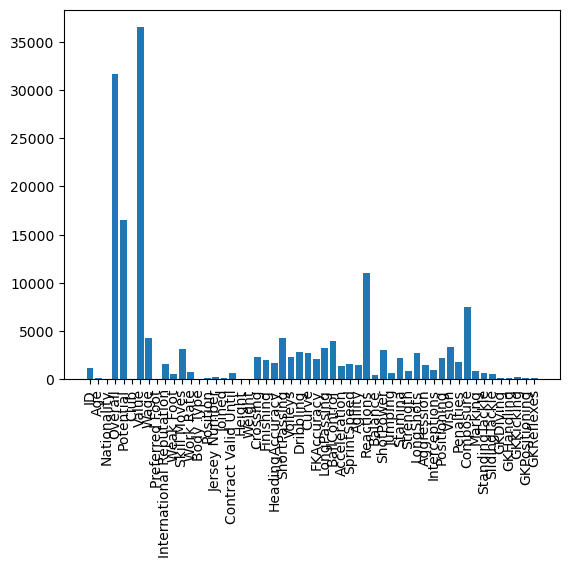

In [33]:
from sklearn.feature_selection import SelectKBest,f_classif, f_regression

Kbest_classif = SelectKBest(score_func=f_regression, k=6)   # score_func=f_regression, ,, for regreassion problem 
Kbest_classif.fit(X_train, y_train)

# what are scores for the features
for i in range(len(Kbest_classif.scores_)):
    print(f'Feature {i} : {round(Kbest_classif.scores_[i],3)}')

print()

plt.bar([X_train.columns[i] for i in range(len(Kbest_classif.scores_))], Kbest_classif.scores_)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (8,6)
plt.show()

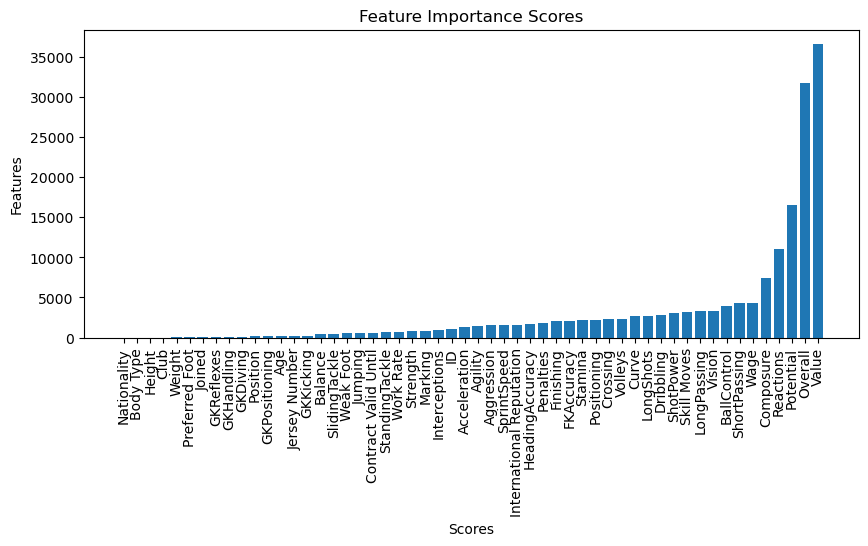

In [34]:
data = sorted(list(zip([X_train.columns[i] for i in range(len(Kbest_classif.scores_))],Kbest_classif.scores_)),key=lambda x:x[1])

# Separate the data into two lists
features = [item[0] for item in data]
scores = [item[1] for item in data]

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
plt.bar(features, scores)
plt.xticks(rotation=90)
plt.xlabel('Scores')
plt.ylabel('Features')
plt.title('Feature Importance Scores')
# plt.savefig("FeatureImportance(SelectKBest).pdf",dpi=300,format="pdf",bbox_inches="tight")
plt.show()

# Mutual Info

Feature 0 : 0.149
Feature 1 : 0.188
Feature 2 : 0.053
Feature 3 : 0.886
Feature 4 : 0.626
Feature 5 : 0.029
Feature 6 : 1.214
Feature 7 : 0.276
Feature 8 : 0.0
Feature 9 : 0.122
Feature 10 : 0.033
Feature 11 : 0.198
Feature 12 : 0.039
Feature 13 : 0.006
Feature 14 : 0.019
Feature 15 : 0.025
Feature 16 : 0.004
Feature 17 : 0.076
Feature 18 : 0.009
Feature 19 : 0.004
Feature 20 : 0.152
Feature 21 : 0.124
Feature 22 : 0.101
Feature 23 : 0.257
Feature 24 : 0.142
Feature 25 : 0.202
Feature 26 : 0.146
Feature 27 : 0.112
Feature 28 : 0.172
Feature 29 : 0.279
Feature 30 : 0.063
Feature 31 : 0.076
Feature 32 : 0.067
Feature 33 : 0.443
Feature 34 : 0.021
Feature 35 : 0.181
Feature 36 : 0.031
Feature 37 : 0.115
Feature 38 : 0.051
Feature 39 : 0.175
Feature 40 : 0.096
Feature 41 : 0.131
Feature 42 : 0.176
Feature 43 : 0.192
Feature 44 : 0.099
Feature 45 : 0.329
Feature 46 : 0.103
Feature 47 : 0.138
Feature 48 : 0.135
Feature 49 : 0.095
Feature 50 : 0.079
Feature 51 : 0.045
Feature 52 : 0.076
Featu

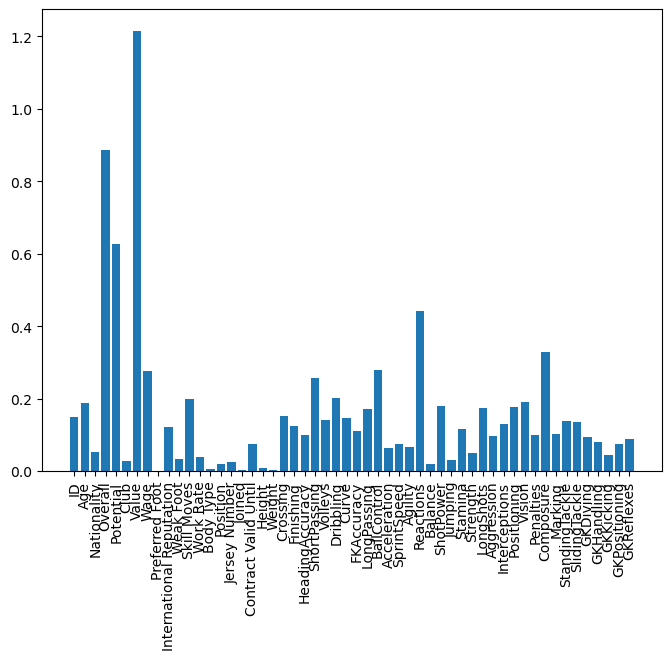

In [35]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

infogain_classif = SelectKBest(score_func=mutual_info_regression, k=6)

infogain_classif.fit(X_train, y_train)

# what are scores for the features
for i in range(len(infogain_classif.scores_)):
    print(f'Feature {i} : {round(infogain_classif.scores_[i],3)}')

print()

# plot the scores
plt.bar([X_train.columns[i] for i in range(len(infogain_classif.scores_))], infogain_classif.scores_)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (8,6)
# plt.savefig("FeatureImportance(Mutual Info).pdf",dpi=300,format="pdf",bbox_inches="tight")
plt.show()

# Percentile

In [36]:
from sklearn.feature_selection import SelectPercentile
percentile = SelectPercentile(percentile=50)
percentile.fit(X_train, y_train)
for b, c in zip(percentile.get_support(),X_train.columns):
    if b==True:
        print(c)

ID
Age
Overall
Potential
Value
Wage
International Reputation
Skill Moves
Crossing
Finishing
HeadingAccuracy
ShortPassing
Volleys
Dribbling
Curve
FKAccuracy
LongPassing
BallControl
Reactions
ShotPower
Stamina
LongShots
Aggression
Positioning
Vision
Penalties
Composure


# RandomForest

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
model_based_feature = SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=42),threshold="median")

model_based_feature.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(random_state=42),
                threshold='median')

In [38]:
from sklearn.feature_selection import RFE
rfe_features = RFE(RandomForestRegressor(n_estimators=10, random_state=42),n_features_to_select=6)

rfe_features.fit(X_train, y_train)

rfe_features.get_support()  # how can we know which column is true

array([ True, False,  True, False,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [39]:
# from sklearn.feature_selection import RFECV

# rfecv = RFECV(estimator=RandomForestRegressor(n_estimators=2, random_state=42) , step=1, cv=5,scoring='neg_mean_absolute_error')   #5-fold cross-validation
# rfecv = rfecv.fit(X_train, y_train)

# print('Optimal number of features :', rfecv.n_features_)
# print('Best features :', X_train.columns[rfecv.support_])

# Chi-Squared

In [40]:
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)
f_p_values

(array([8.85797452e+06, 7.33295889e+03, 3.86319262e+04, 2.52380696e+04,
        1.50750101e+04, 1.37733049e+05, 2.31421269e+05, 3.31749792e+05,
        2.53087395e+02, 9.13258985e+03, 4.00098511e+02, 1.67963335e+03,
        2.66848154e+03, 7.08724407e+02, 9.08001388e+03, 2.02318236e+04,
        2.69758197e+05, 1.66421470e+03, 3.39624110e+03, 2.81901082e+03,
        2.50435824e+04, 2.75886894e+04, 1.79916963e+04, 1.99583186e+04,
        2.72600844e+04, 2.58065497e+04, 2.88586489e+04, 2.44620240e+04,
        2.10815571e+04, 2.39562198e+04, 1.10898298e+04, 1.12210124e+04,
        1.18765015e+04, 1.93756322e+04, 6.98646785e+03, 2.18908299e+04,
        6.05922180e+03, 1.65335397e+04, 7.90117126e+03, 3.04136950e+04,
        1.85669314e+04, 2.20057665e+04, 2.64248403e+04, 1.86234284e+04,
        1.77072931e+04, 1.85902450e+04, 1.92855921e+04, 2.16442045e+04,
        2.02640546e+04, 1.81083424e+04, 1.65099601e+04, 2.30440931e+04,
        2.22887868e+04, 2.01115185e+04]),
 array([0.00000000e+00

# Principal Component Analysis (PCA)

In [41]:
pca = PCA(n_components=2)
PC = pca.fit_transform(X_train)
# selected_features_pca = [f"PCA_{i}" for i in range(1, 6)]
p_Df = pd.DataFrame(data = PC,columns = ['principal component 1', 'principal component 2'])
p_Df.head()

,principal component 1,principal component 2
0,7739.047863,-288.720826
1,-1416.460092,-133.140925
2,-1070.108398,-286.116352
3,-2578.125405,-161.523739
4,564.625304,705.566431


# Genetic Algorithm

In [50]:
import matplotlib.pyplot as plt
from sklearn_genetic import GAFeatureSelectionCV
from sklearn_genetic.plots import plot_fitness_evolution
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.metrics import r2_score
import numpy as np

In [44]:
from sklearn.metrics import r2_score

In [45]:
clf = RandomForestRegressor()

evolved_estimator = GAFeatureSelectionCV(
    estimator=clf,
    cv=3,
    scoring="r2",
    population_size=10,
    generations=1,
    n_jobs=-1,
    verbose=True,
    keep_top_k=2,
    elitism=True,
)

In [46]:
# Train and select the features
evolved_estimator.fit(X_train, y_train)

gen	nevals	fitness 	fitness_std	fitness_max	fitness_min
0  	10    	0.941424	0.0517543  	0.98145    	0.834247   
1  	20    	0.979588	0.00382375 	0.982456   	0.972316   


GAFeatureSelectionCV(estimator=RandomForestRegressor(), generations=1,
                     keep_top_k=2, n_jobs=-1, population_size=10, scoring='r2')

In [55]:
features = evolved_estimator.support_

# Predict only with the subset of selected features
y_predict_ga = evolved_estimator.predict(X_test)
accuracy = r2_score(y_test, y_predict_ga)
print("Accuracy: ",accuracy)

Accuracy:  0.9829803008554059


In [63]:
for b, c in zip(features,df2.columns):
    if b==True:
        print(c)

Age
Nationality
Overall
Value
Wage
Preferred Foot
Body Type
Jersey Number
Joined
Contract Valid Until
Height
Finishing
ShortPassing
Volleys
Curve
LongPassing
Acceleration
Reactions
Balance
Strength
LongShots
Interceptions
Positioning
Vision
Composure
StandingTackle
GKHandling
GKKicking
GKPositioning
GKReflexes


In [64]:
import sklearn
print(sklearn.metrics.get_scorer_names())

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weight